data https://insights.stackoverflow.com/survey

tutorial https://www.dataquest.io/blog/how-to-analyze-survey-data-python-beginner/

In [1]:
#survey analysis
import pandas as pd

In [2]:
#data
df = pd.read_csv('survey_results_public.csv')

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
# shape of the data
df.shape


(64461, 61)

### Analyzing Multiple Choice Survey Questions

In [7]:
df['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

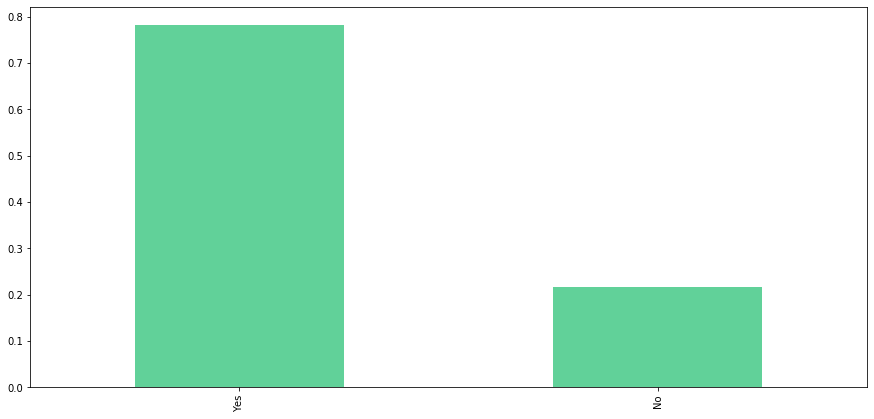

In [12]:
%matplotlib inline
df['Hobbyist'].value_counts(normalize=True).plot(kind="bar", figsize=(15,7), color="#61d199")

78% of developers using the site are hobbyists

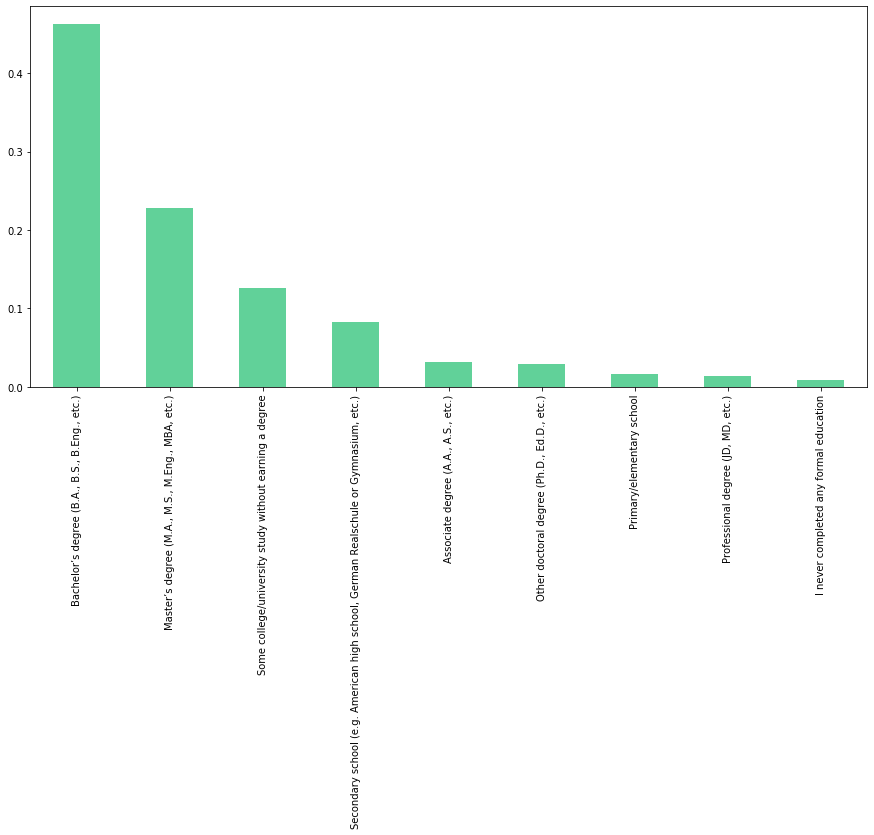

In [15]:
%matplotlib inline
df['EdLevel'].value_counts(normalize=True).plot(kind="bar", figsize=(15,7), color="#61d199")

46% of developers have a Bachelors degree

### Analyzing Multi-Answer Survey Questions

In [16]:
df["LanguageWorkedWith"].head()

0      C#;HTML/CSS;JavaScript
1            JavaScript;Swift
2    Objective-C;Python;Swift
3                         NaN
4           HTML/CSS;Ruby;SQL
Name: LanguageWorkedWith, dtype: object

answers were stored with a sort of delimiter

In [18]:
lang_lists = df["LanguageWorkedWith"].str.split(';', expand=True)
lang_lists.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,C#,HTML/CSS,JavaScript,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JavaScript,Swift,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Objective-C,Python,Swift,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HTML/CSS,Ruby,SQL,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
lang_lists.stack().value_counts()

JavaScript               38822
HTML/CSS                 36181
SQL                      31413
Python                   25287
Java                     23074
Bash/Shell/PowerShell    18980
C#                       18041
PHP                      15007
TypeScript               14578
C++                      13707
C                        12487
Go                        5038
Kotlin                    4468
Ruby                      4046
Assembly                  3553
VBA                       3499
Swift                     3397
R                         3288
Rust                      2929
Objective-C               2340
Dart                      2280
Scala                     2052
Perl                      1796
Haskell                   1222
Julia                      519
dtype: int64

Use .stack() to slice this dataframe apart and stack the columns on top of one another.

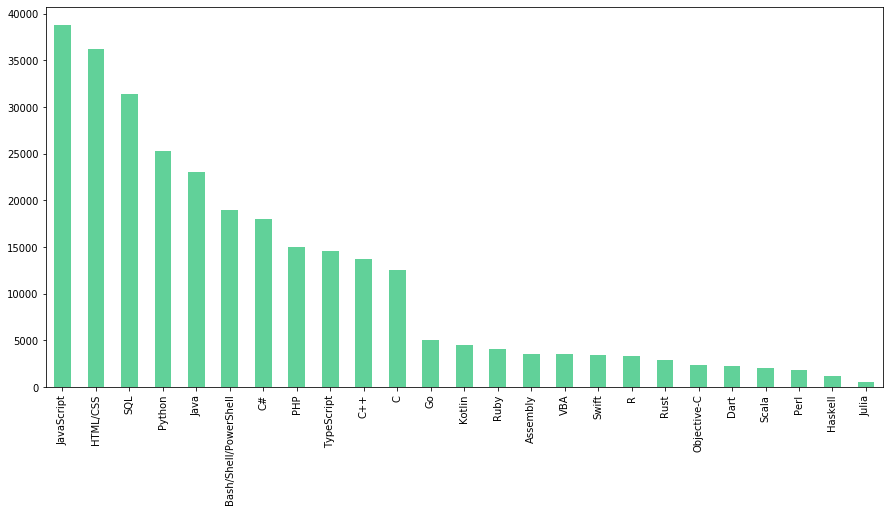

In [24]:
lang_lists.stack().value_counts().plot(kind='bar', figsize=(15,7), color="#61d199")